In [1]:
import json
import pandas as pd
import sys
import matplotlib.pyplot as plt

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from plots import upset_plot
from evaluation.evaluation_func import read_results

In [2]:
# def create_separate_df(mode = "balanced"):
#     base_path = "/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/"
 
#     central = pd.read_csv(base_path + mode + "/results/central_res.tsv", sep="\t", index_col=0).dropna()
#     FedProt = pd.read_csv(base_path + mode + "/results/DPE.csv", sep="\t", index_col=0).dropna()

#     Fisher = pd.read_csv(base_path + mode + "/results/MA_CM.tsv", sep="\t", index_col=1).dropna()
#     Stouffer = pd.read_csv(base_path + mode + "/results/MA_Stouffer.tsv", sep="\t", index_col=0)
#     RankProduct = pd.read_csv(base_path + mode + "/results/MA_RankProd.tsv", sep="\t", index_col=0).dropna()
#     REM_res = pd.read_csv(base_path + mode + "/results/MA_REM.tsv", sep="\t", index_col=1).dropna()

#     filter_list_META = {
#         "Central" : pd.DataFrame(central.index.tolist(), columns=['proteins']),
#         "FedProt" : pd.DataFrame(FedProt.index, columns=['proteins']),
#         "Fisher" : pd.DataFrame(Fisher.index, columns=['proteins']),
#         "Stouffer" : pd.DataFrame(Stouffer.index, columns=['proteins']),
#         "RankProd" : pd.DataFrame(RankProduct.index, columns=['proteins']),
#         "REM" : pd.DataFrame(REM_res.index, columns=['proteins'])
#     }

#     return filter_list_META


In [3]:
def create_separate_df(mode = "balanced"):
    base_path = "/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/"
    df = read_results(
        base_path + mode + "/results/",
        deqms_name = "central_res.tsv",
        drop_na = False
    )

    filter_list_META = {
        # toke all columns with DEqMS in colname
        "Central" : pd.DataFrame(df[df.columns[df.columns.str.contains("DEqMS")]].dropna().index.tolist(), columns=['proteins']),
        "FedProt" : pd.DataFrame(df[df.columns[df.columns.str.contains("FedProt")]].dropna().index, columns=['proteins']),
        "Fisher" : pd.DataFrame(df[df.columns[df.columns.str.contains("Fisher")]].dropna().index, columns=['proteins']),
        "Stouffer" : pd.DataFrame(df[df.columns[df.columns.str.contains("Stouffer")]].dropna().index, columns=['proteins']),
        "RankProd" : pd.DataFrame(df[df.columns[df.columns.str.contains("RankProd")]].dropna().index, columns=['proteins']),
        "REM" : pd.DataFrame(df[df.columns[df.columns.str.contains("REM")]].dropna().index, columns=['proteins'])
    }

    return filter_list_META

# Meta analyses

In [4]:
# Read the JSON file into a Python dictionary
with open('/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/analysed_proteins.json', 'r') as file:
    filter_list_META = json.load(file)

# transform list into pandas df column
for key in filter_list_META.keys():
    for center in filter_list_META[key].keys():
        # use proteins as a colname of a dataframe
        filter_list_META[key][center] = pd.DataFrame(filter_list_META[key][center], columns=['proteins'])

In [6]:
results = create_separate_df("balanced")

Results loaded for DEqMS with 2831 proteins.
Results loaded for FedProt with 2831 proteins.
Results loaded for Fisher with 2824 proteins.
Results loaded for REM with 3023 proteins.
Results loaded for Stouffer with 2238 proteins.
Results loaded for RankProd with 3023 proteins.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/balanced/results/ with 3023 genes. Adj.p-values were not log-transformed.


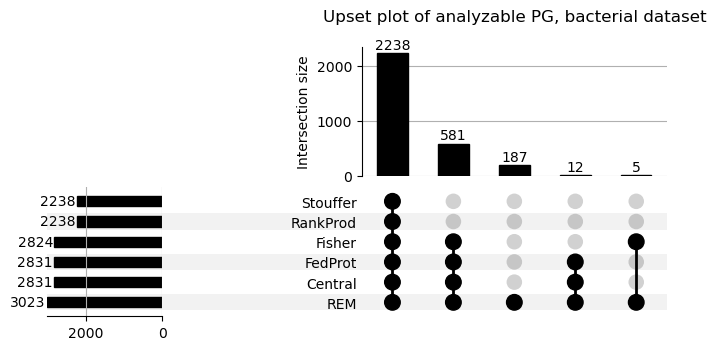

In [9]:
# do not show warnings
import warnings
warnings.filterwarnings("ignore")

balanced_plot = upset_plot.generate_upset_plot(
    results,
    colname='proteins',
    title='Upset plot of analyzable PG, bacterial dataset\n',
    categories=results.keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/balanced/upset_plot_balanced_v2.svg',
)


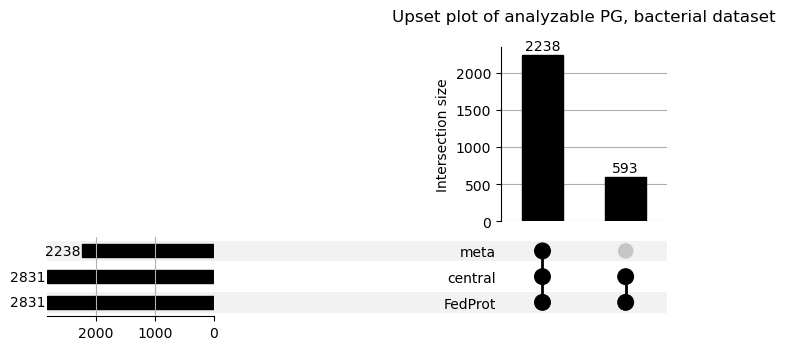

In [10]:
balanced_plot = upset_plot.generate_upset_plot(
    filter_list_META['balanced'],
    colname='proteins',
    title='Upset plot of analyzable PG, bacterial dataset\n',
    categories=filter_list_META['balanced'].keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/balanced/upset_plot_balanced.svg',
)

Results loaded for DEqMS with 2860 proteins.
Results loaded for FedProt with 2860 proteins.
Results loaded for Fisher with 2816 proteins.
Results loaded for REM with 3016 proteins.
Results loaded for Stouffer with 2501 proteins.
Results loaded for RankProd with 2501 proteins.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/imbalanced/results/ with 3016 genes. Adj.p-values were not log-transformed.


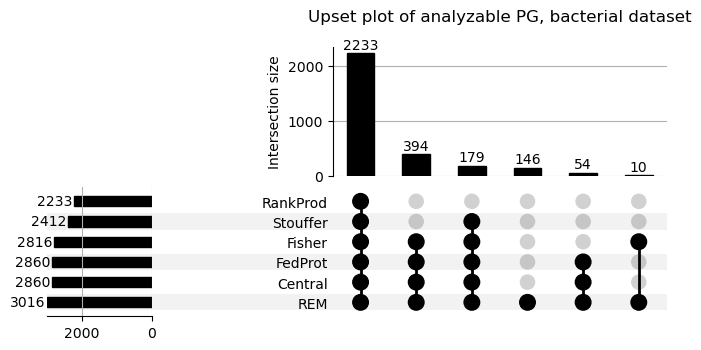

In [25]:
results = create_separate_df("imbalanced")

balanced_plot = upset_plot.generate_upset_plot(
    results,
    colname='proteins',
    title='Upset plot of analyzable PG, bacterial dataset\n',
    categories=results.keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/imbalanced/upset_plot_imbalanced_v2.svg',
)


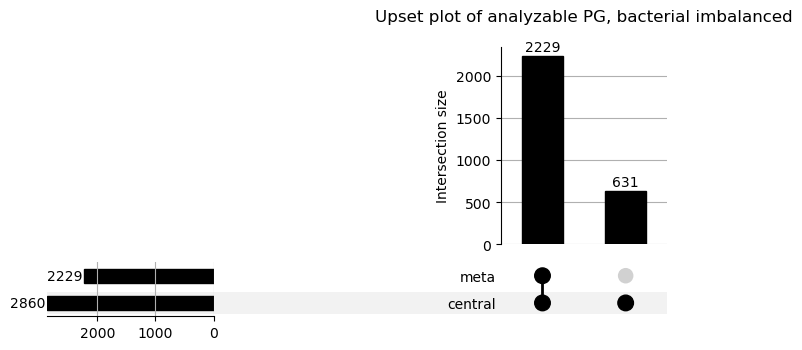

In [26]:
balanced_plot = upset_plot.generate_upset_plot(
    filter_list_META['imbalanced'],
    colname='proteins',
    title='Upset plot of analyzable PG, bacterial imbalanced\n',
    categories=filter_list_META['imbalanced'].keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/imbalanced/upset_plot_imbalanced.svg',
)

Results loaded for DEqMS with 2859 proteins.


Results loaded for FedProt with 2859 proteins.
Results loaded for Fisher with 2827 proteins.
Results loaded for REM with 3027 proteins.
Results loaded for Stouffer with 2516 proteins.
Results loaded for RankProd with 2516 proteins.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/downsampled/results/ with 3027 genes. Adj.p-values were not log-transformed.


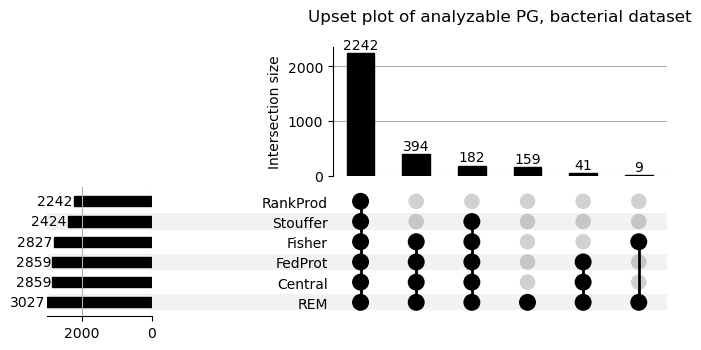

In [27]:
results = create_separate_df("downsampled")

balanced_plot = upset_plot.generate_upset_plot(
    results,
    colname='proteins',
    title='Upset plot of analyzable PG, bacterial dataset\n',
    categories=results.keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/downsampled/upset_plot_downsampled_v2.svg',
)


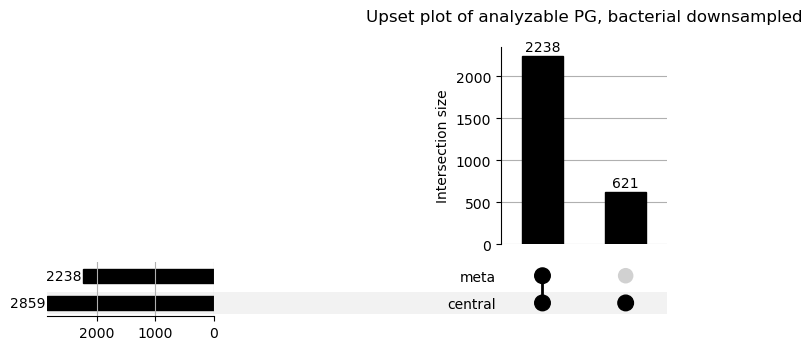

In [28]:
balanced_plot = upset_plot.generate_upset_plot(
    filter_list_META['downsampled'],
    colname='proteins',
    title='Upset plot of analyzable PG, bacterial downsampled\n',
    categories=filter_list_META['downsampled'].keys(),
    save_plot=True, 
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/downsampled/upset_plot_downsampled.svg',
)


# Plot intersection labs

In [6]:
# Read the JSON file into a Python dictionary
with open('/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/analysed_proteins_LABS.json', 'r') as file:
    lists_labs = json.load(file)

# transform list into pandas df column
for key in lists_labs.keys():
    for center in lists_labs[key].keys():
        # use proteins as a colname of a dataframe
        lists_labs[key][center] = pd.DataFrame(lists_labs[key][center], columns=['proteins'])

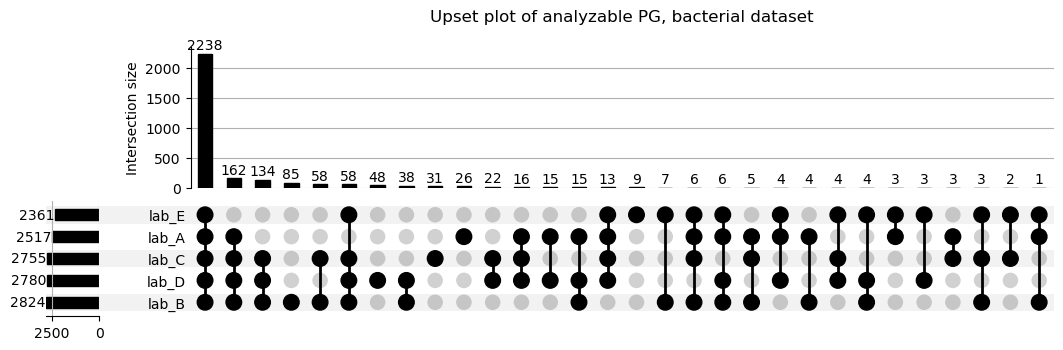

In [7]:
balanced_plot = upset_plot.generate_upset_plot(
    lists_labs['balanced'],
    colname='proteins',
    title='Upset plot of analyzable PG, bacterial dataset\n',
    categories=lists_labs['balanced'].keys(),
    save_plot=True,
    size_fig=(13, 3.5),
    path_svg='/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/balanced/upset_plot_balanced_LABS.svg',
)